In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [2]:
df= pd.read_csv('SLC_ds.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
#label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the non-numeric values
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

# Separate the features and target class
X = df.drop('LUNG_CANCER',axis='columns')
Y = df.LUNG_CANCER
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
missing_values=df.isnull().sum()
print(missing_values)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [94]:
#DATA VISUALISATION

In [5]:
df.duplicated().sum()

33

In [6]:
dp=df.drop_duplicates()
dp.duplicated().sum()

0

In [97]:
dp.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\1575580132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dp.corr()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
GENDER,1.000000,-0.013120,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547
AGE,-0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,-0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,-0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,-0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,-0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846


C:\Users\HP\AppData\Local\Temp\ipykernel_9708\2863061186.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\2863061186.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_9708\28630611

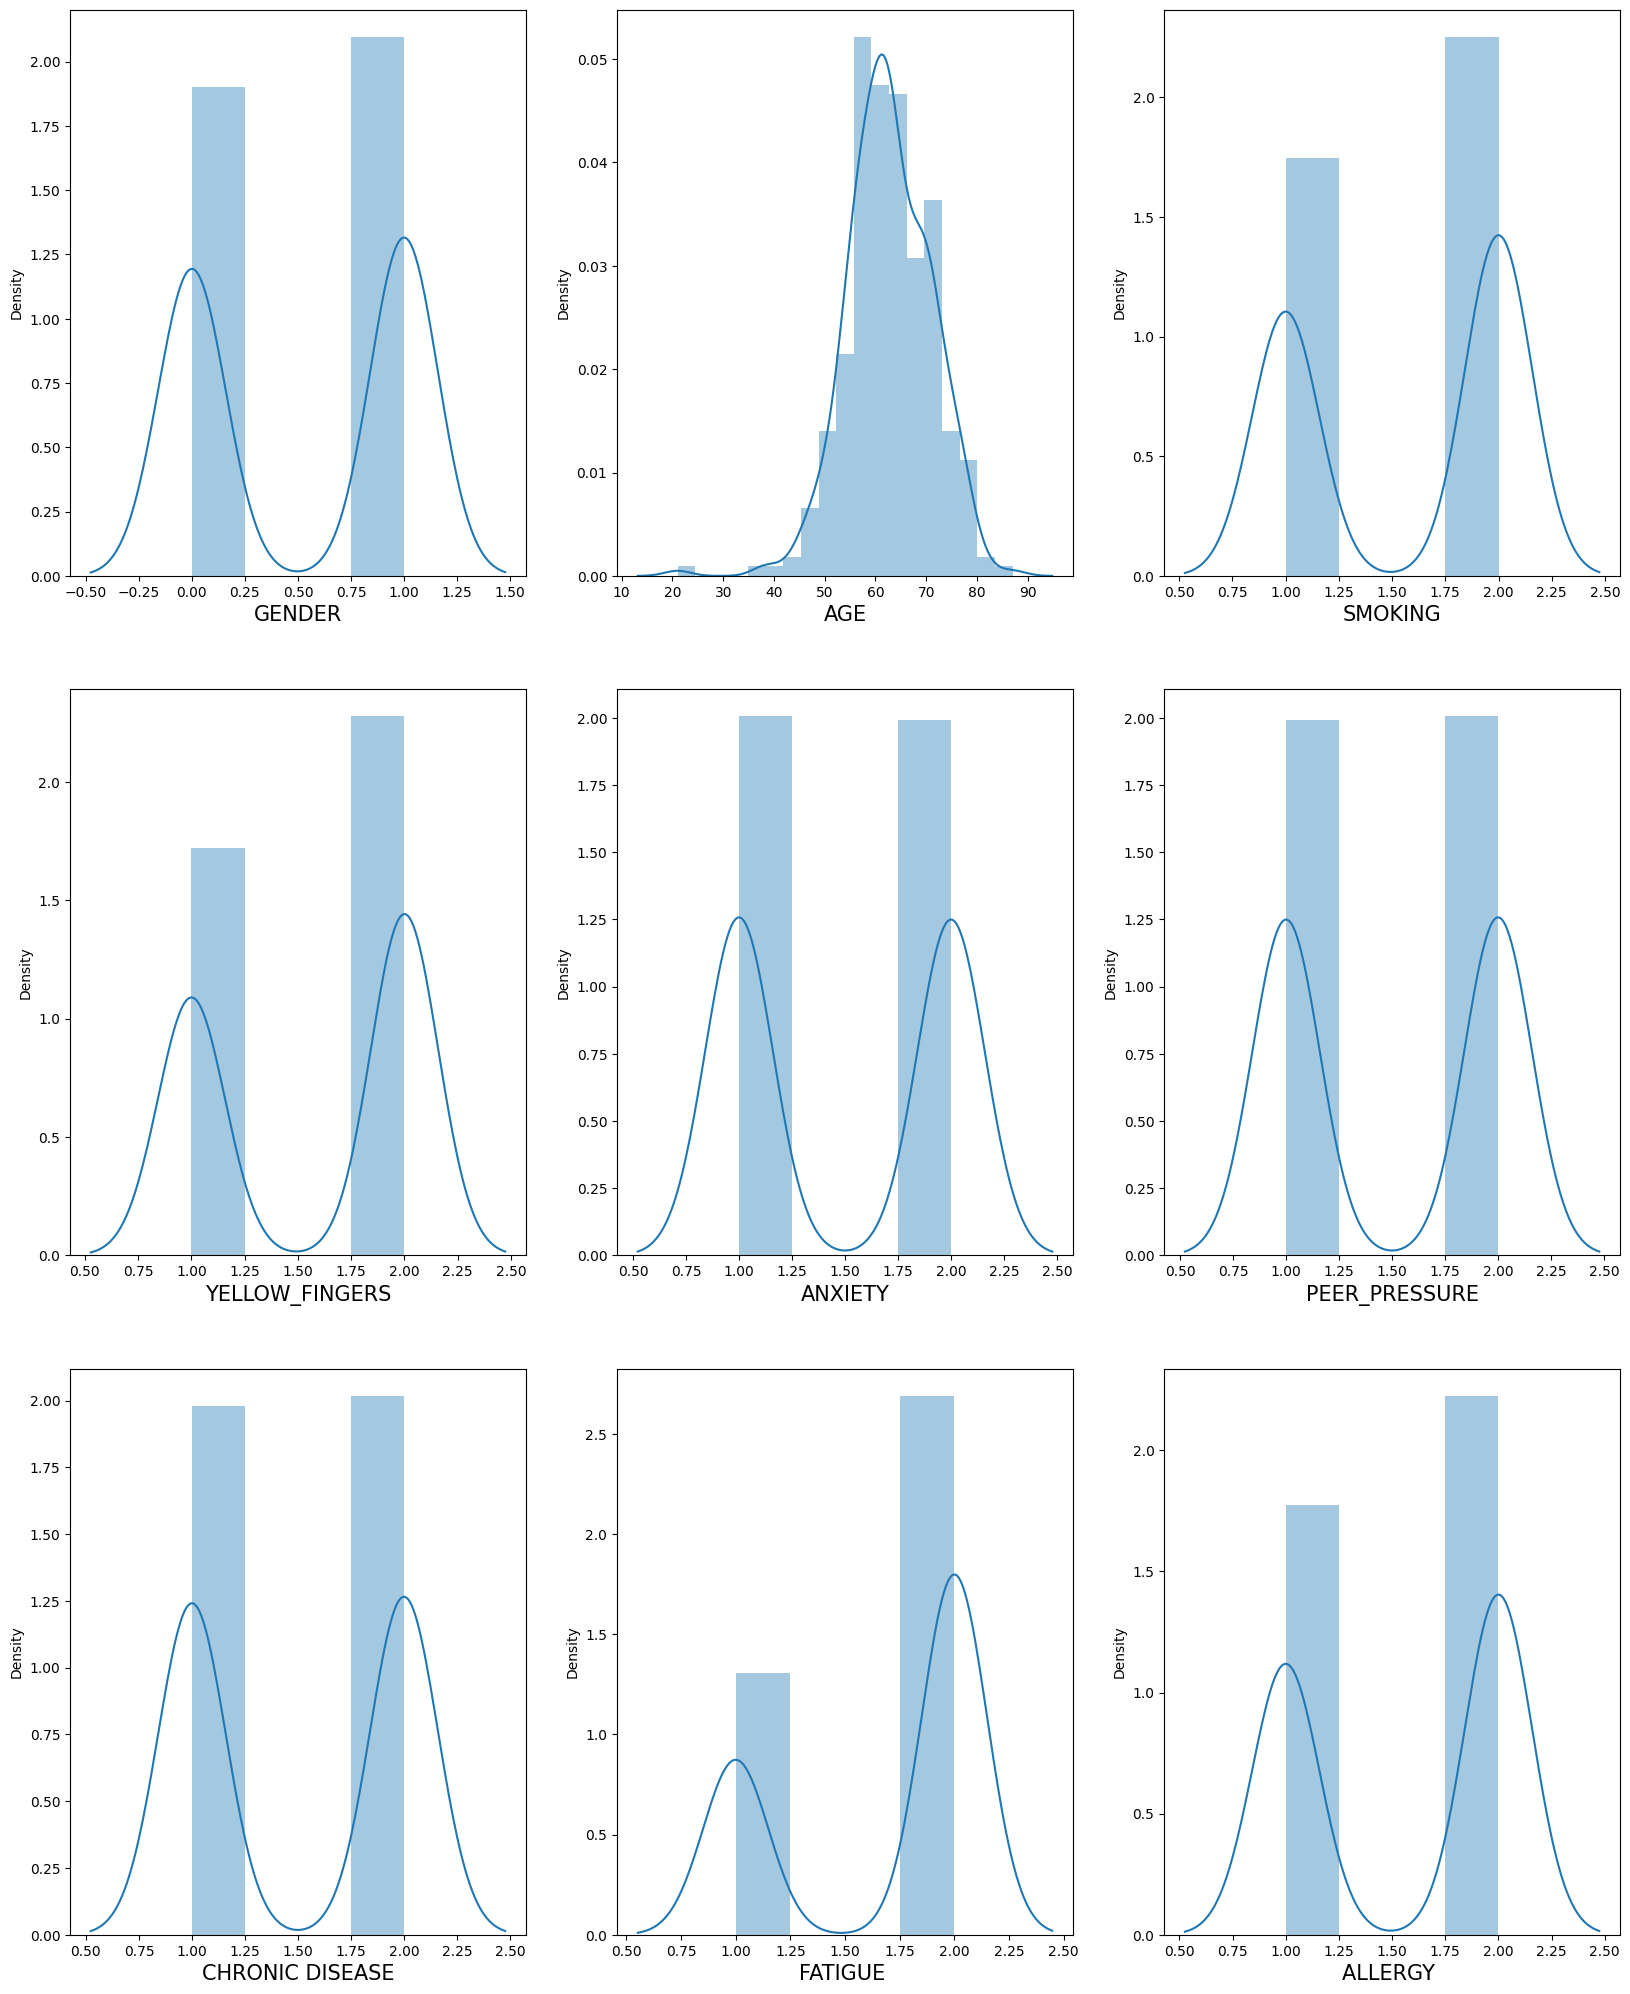

In [99]:
#Data distribution per attribute
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in dp:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\842001212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dp.corr(), annot=True);


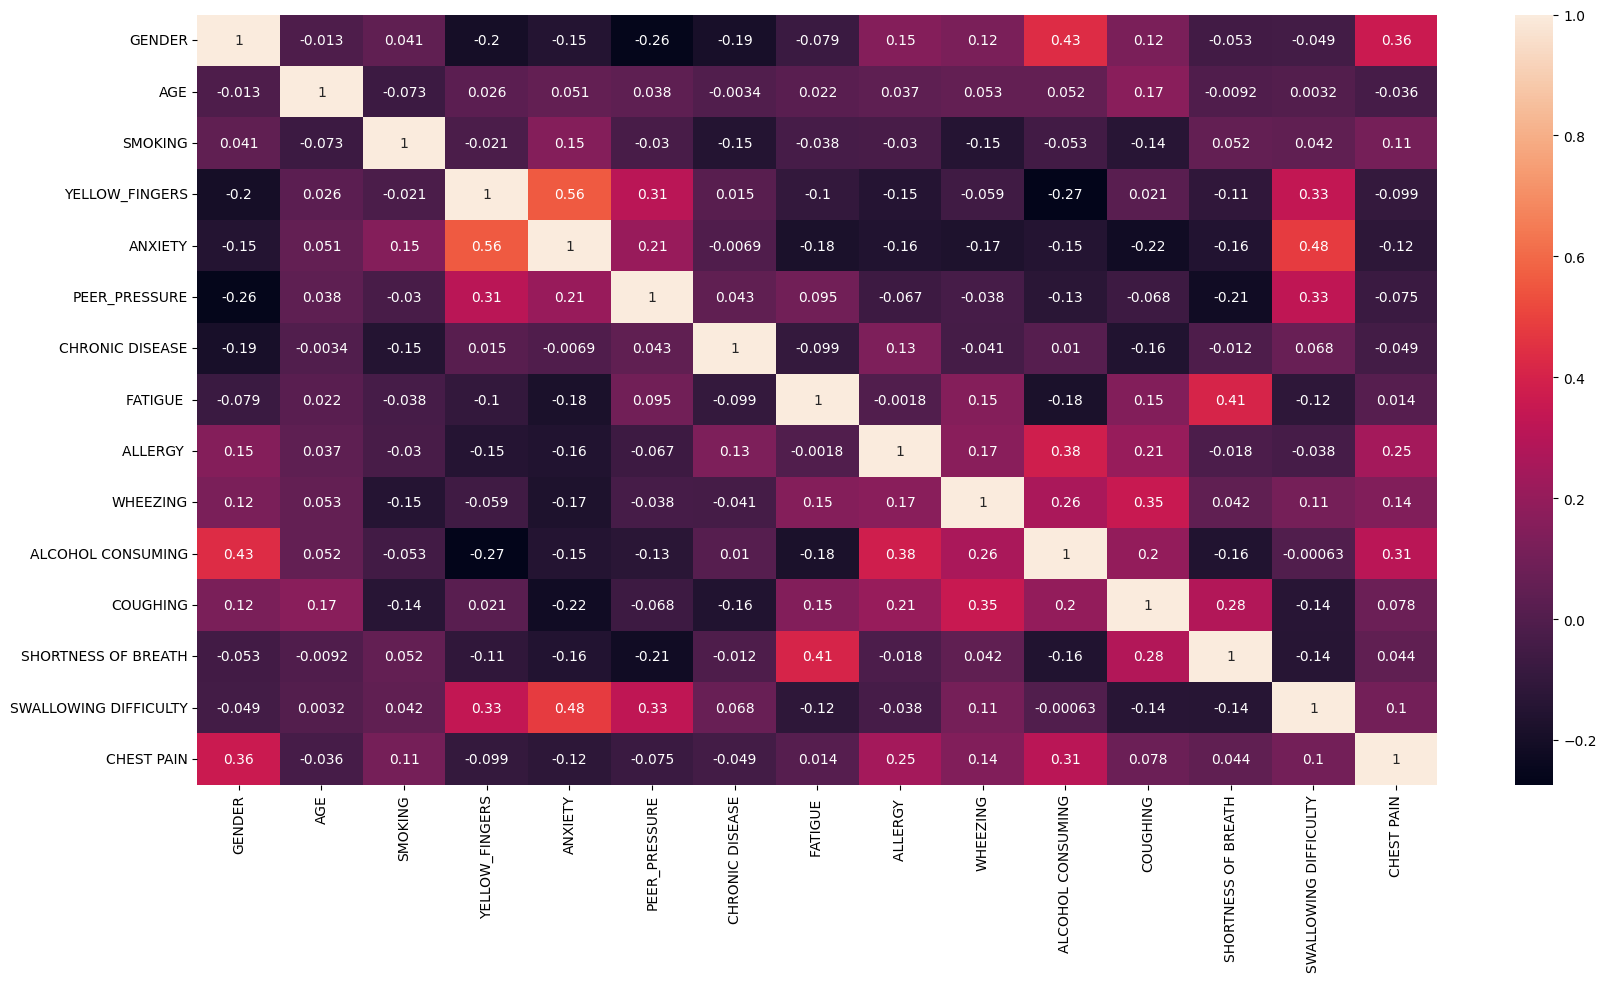

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(dp.corr(), annot=True);
plt.show()

array([[<AxesSubplot: title={'center': 'GENDER'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'SMOKING'}>,
        <AxesSubplot: title={'center': 'YELLOW_FINGERS'}>],
       [<AxesSubplot: title={'center': 'ANXIETY'}>,
        <AxesSubplot: title={'center': 'PEER_PRESSURE'}>,
        <AxesSubplot: title={'center': 'CHRONIC DISEASE'}>,
        <AxesSubplot: title={'center': 'FATIGUE '}>],
       [<AxesSubplot: title={'center': 'ALLERGY '}>,
        <AxesSubplot: title={'center': 'WHEEZING'}>,
        <AxesSubplot: title={'center': 'ALCOHOL CONSUMING'}>,
        <AxesSubplot: title={'center': 'COUGHING'}>],
       [<AxesSubplot: title={'center': 'SHORTNESS OF BREATH'}>,
        <AxesSubplot: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot: title={'center': 'CHEST PAIN'}>, <AxesSubplot: >]],
      dtype=object)

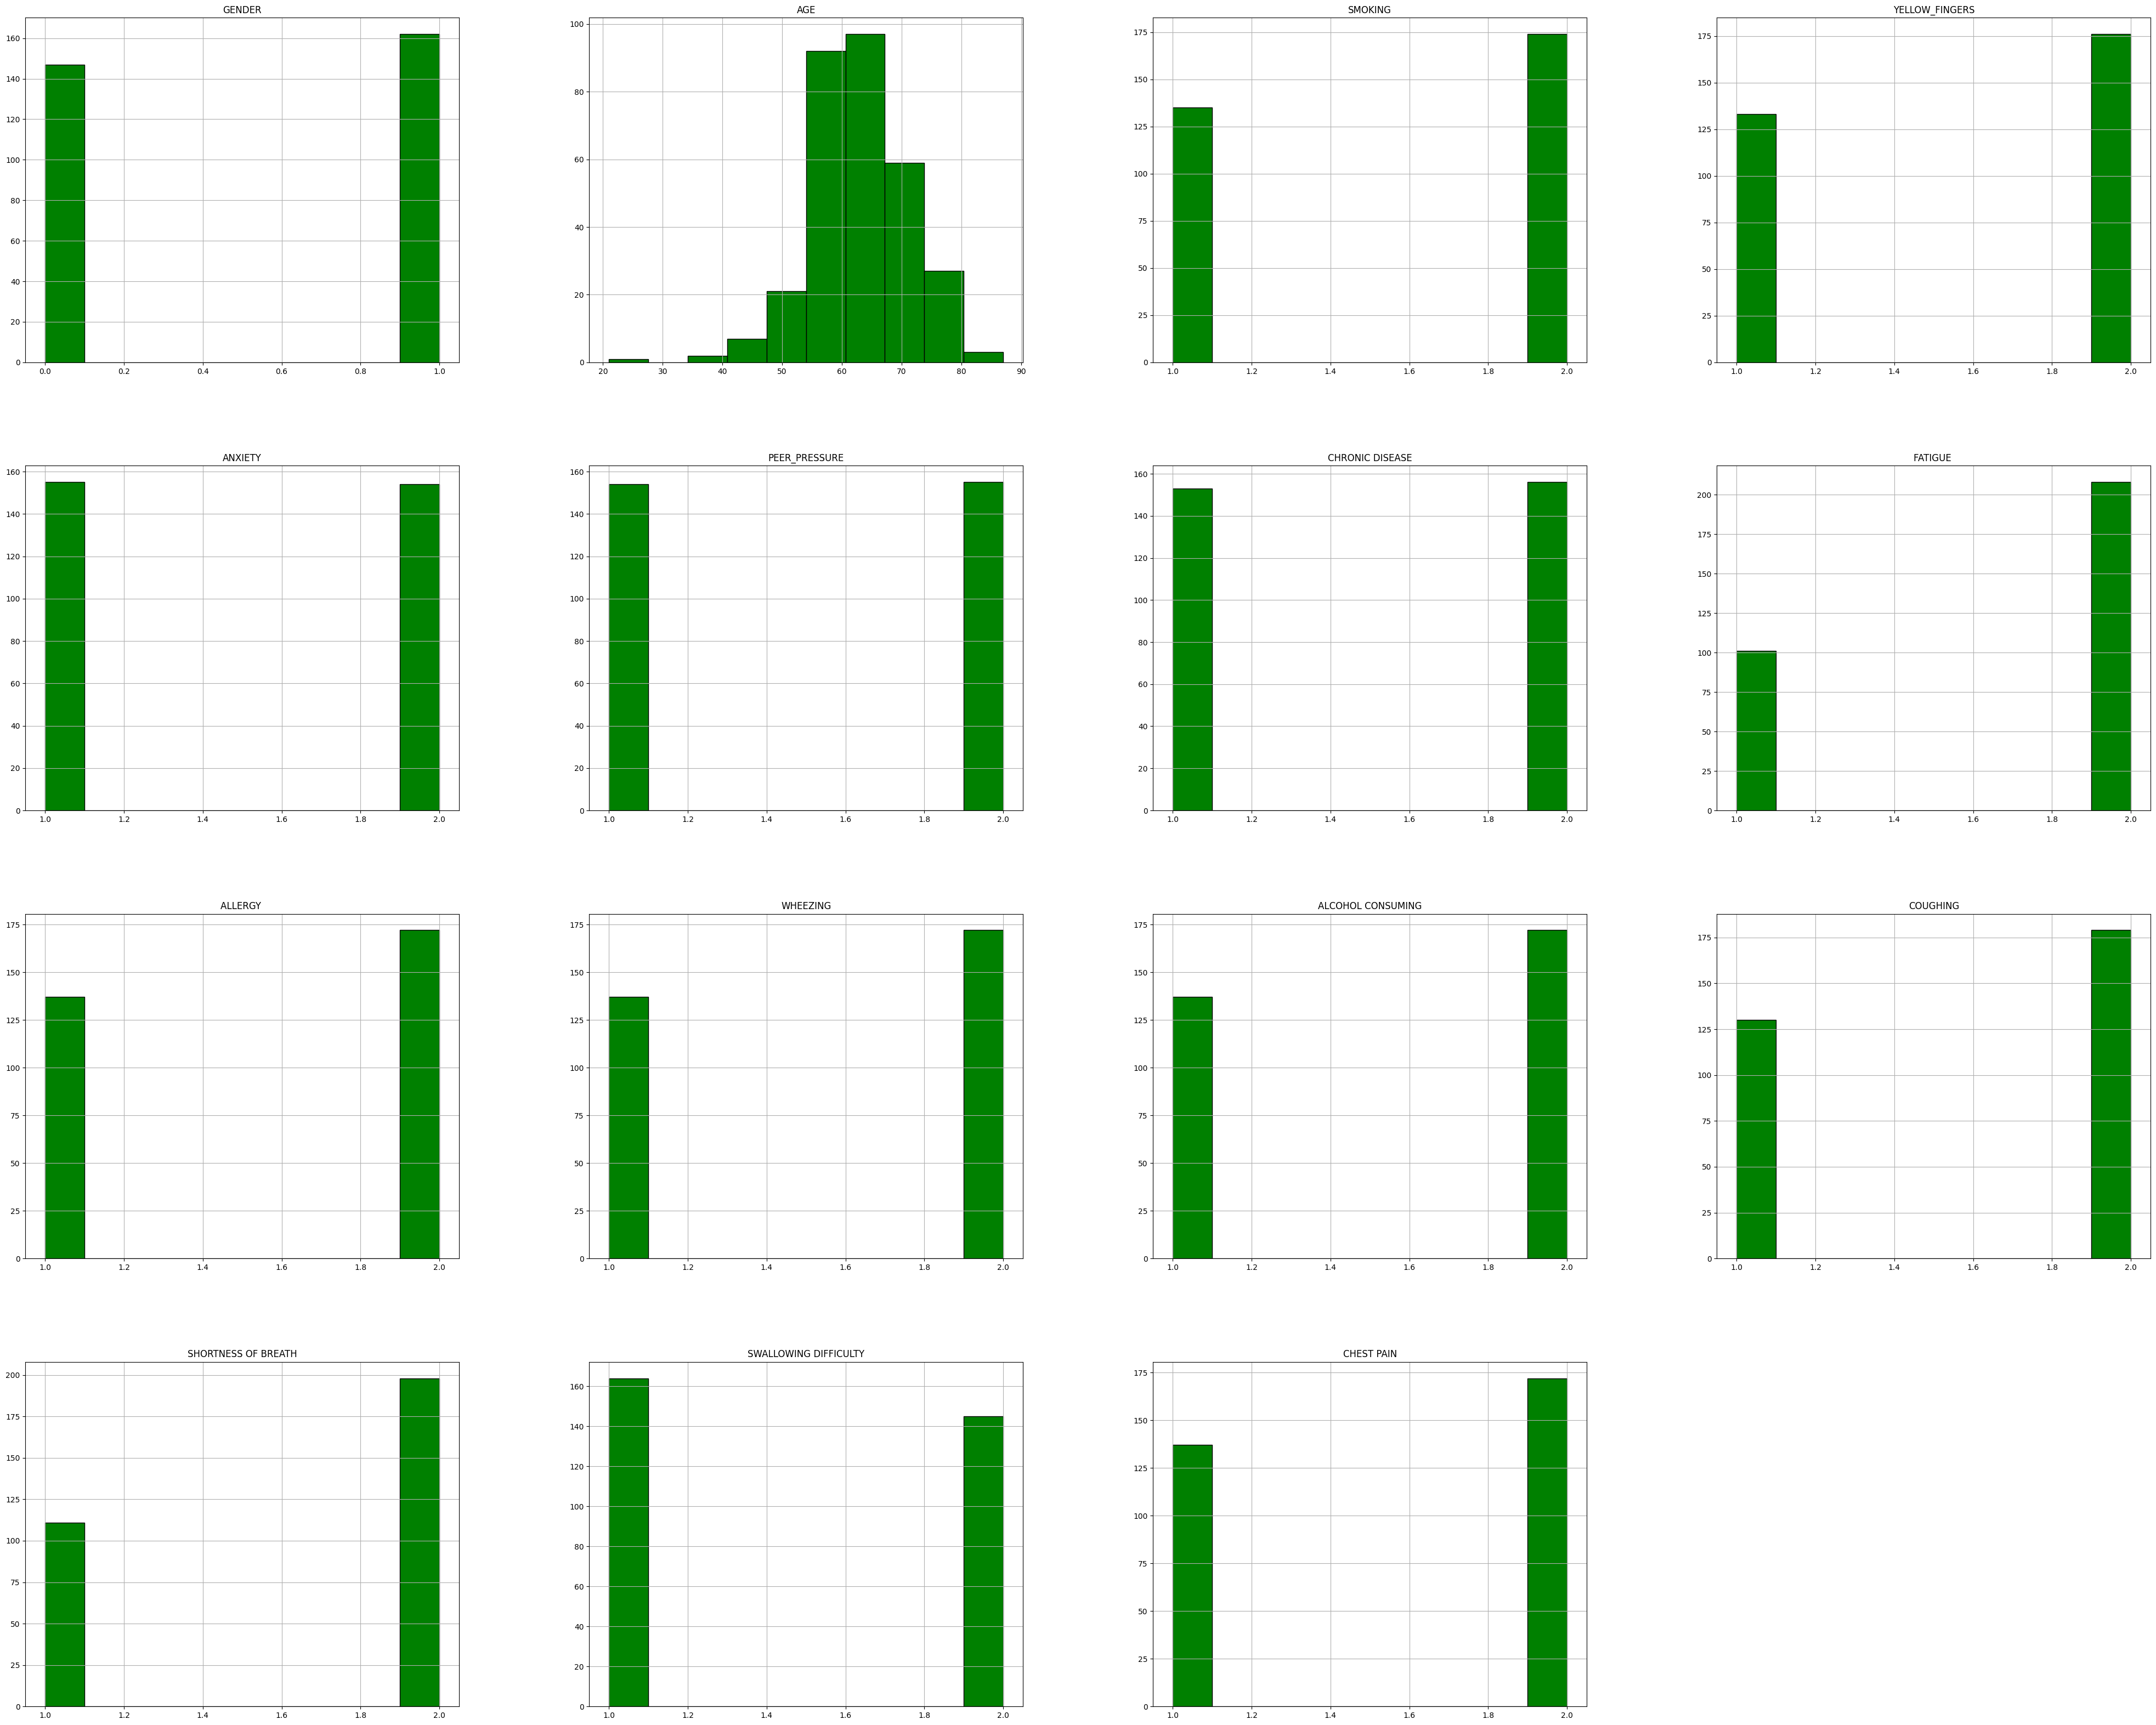

In [104]:
df.hist(figsize = (50,40),color = 'green',edgecolor = 'black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


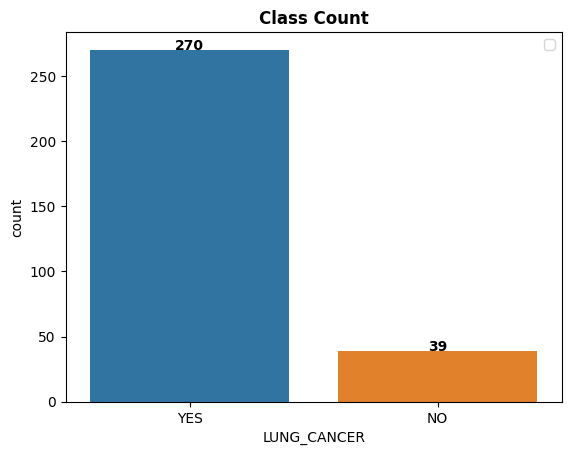

In [105]:
total = float(df.shape[0])
ploting = sns.countplot(x='LUNG_CANCER', data=df)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2,
           height,
           '{:.0f}'.format((height)),
           ha='center',fontweight='bold')
plt.title('Class Count', fontweight='bold')
plt.legend()
#plt.legend(prop={'weight':'bold'})
plt.show()

<AxesSubplot: >

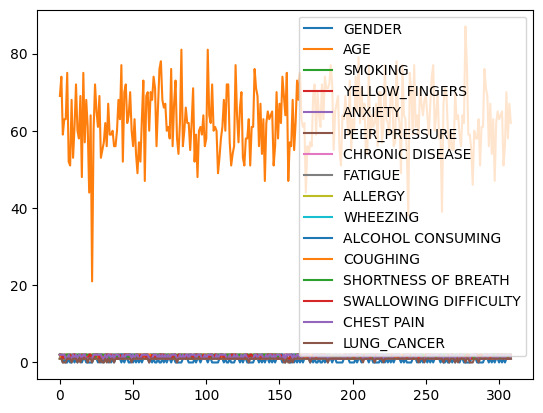

In [106]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})
df.plot()

In [108]:
#CLASS IMBALANCE HANDLING

Before Counter({'YES': 270, 'NO': 39})


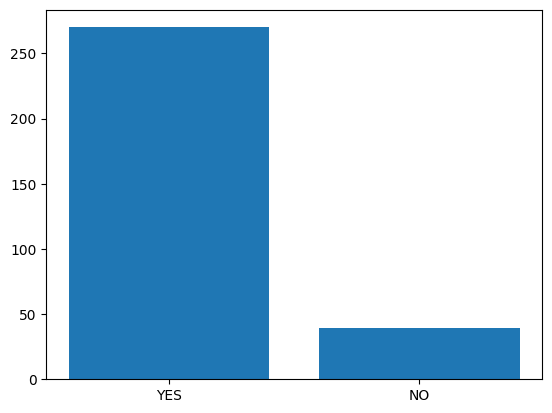

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
## summarized distribution
counter = Counter(Y)
print('Before',counter)
oversample= SMOTE()
X,Y=oversample.fit_resample(X,Y)

# distribution plot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


After Counter({'YES': 270, 'NO': 270})


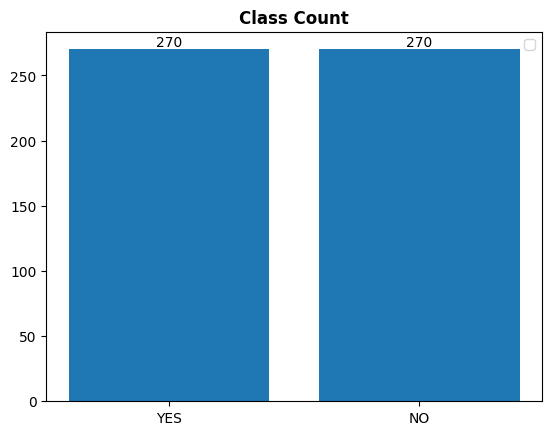

In [8]:
#total = float(df.shape[0])

counter = Counter(Y)
print('After',counter)
pyplot.bar(counter.keys(), counter.values())
for x,y in counter.items():
    pyplot.annotate(str(y),(x,y), ha= 'center', va='bottom')
plt.title('Class Count', fontweight='bold')
plt.legend()
#plt.legend(prop={'weight':'bold'})
plt.show()

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
#FEATURE SELECTION
selector =SelectKBest(score_func=f_classif, k=9)
X_new= selector.fit_transform(X,Y)
print("Num Features before:", x_train.shape[1])
print("Num Features after:",X_new.shape[1])
mask= selector.get_support()

feature_names= X.columns[mask]
print("Selected Features",feature_names)

Num Features before: 15
Num Features after: 9
Selected Features Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#Feature K Best Selection

#classifer

clf1= LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)

clf2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,   bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf3=SVC()
model = VotingClassifier(estimators=[('LR', clf1), ('rf', clf2), ('svm', clf3)], voting='hard')

model.fit(x_train, y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

cv=KFold(n_splits=10, shuffle=True)
scores=cross_val_score(model,selector.fit_transform(X,Y),Y,cv=cv)
# report performance
def print_report(scores, x_train, x_test, y_train, y_test):
    print("\n\nValidation Report:\n------------------")
    print(classification_report(y_test,scores.predict(x_test)))
print_report(model, x_train, x_test, y_train, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.



Validation Report:
------------------
              precision    recall  f1-score   support

          NO       0.96      0.92      0.94        51
         YES       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



<Figure size 1200x1200 with 0 Axes>

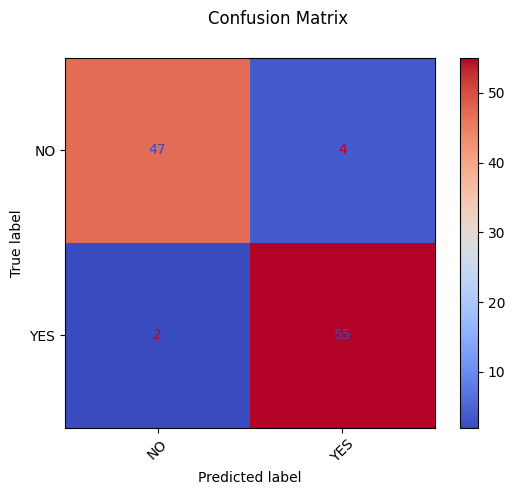

[[47  4]
 [ 2 55]]


0.9444444444444444

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()
print(cm)
acc_scale = accuracy_score(y_test,y_pred)
acc_scale